#**Desarrollo experimental**


***Partimos de hipotesis de pendulo ideal:***

*   Hilo inextensible y sin masa.
*   Rozamiento despreciable.
*   Oscilaciones pequeñas.
*   Masa puntual y sin rotacion.
*   Contenido en un plano.

***Para intentar mantener el experimento dentro de lo ideal:***
*  El hilo era delgado y firme
*  Despreciamos su rozamiento al haber medido la cantidad de periodos que requeria la masa para frenarse.
*  El rango en el que fuimos variando la longitud tenia valores lo suficientemente largos para poder mover el pendulo con comodidad sin necesidad de usar angulos grandes. Aun asi, con un poco de impresicion, intentamos guiarnos de un transportador.
* La masa tenia una especie de palito de ancho despreciable con el que el sensor detectaba el movimiento del pendulo, sin necesidad de tener que medir el radio de la masa y considerarlo en las cuentas.
* Para mantenerlo en un plano sin rotacion, sujetamos la masa con dos hilos y lo colgamos de manera que queden alineados, formando un triangulo idealmente isoceles, luego usando trigonometria, calculamos cuanto vale el cateto que representaria al hilo en el plano como se muestra en la siguiente figura:

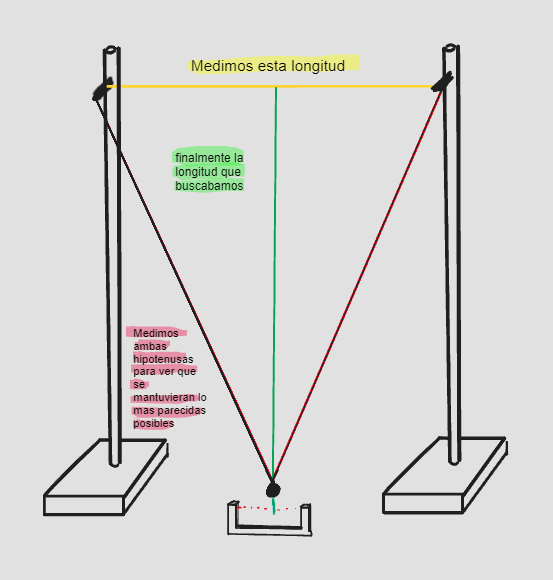


***La formula para calcular la longitud que utilizamos fue:***

$Cverde = \sqrt{(Hroja)^2 - (\frac{Camarillo}{2})^2}$

***Instrumentos utilizados:***
* Cinta metrica
* Photogate
* MotionDAQ(Software)
* SensorDAQ(Hardware)
* Barras del laboratorio
* Ganchos
* Instrumentos varios para variar la altura del soporte del photogate
* Calibre Vernier

La informacion obtenida por el photogate era procesada por el SensorDAQ donde se digitalizaban los datos para poder analizarlos en la computadora con el software mencionado.

***Datos sobre el momento de experimentación:***

Fuimos midiendo el periodo para distintas longitudes, esto fue logrado moviendo las "barras del laboratorio" permitiéndonos que la longitud aumente o disminuya para cada test realizado. Cabe aclarar que no hicimos reiteradas mediciones para una misma longitud por lo tanto no podemos calcular la desviacion estandar de longitudes, pero por la manera en la que medimos y el intrumento que usamos, nos parecio razonable estimar que el error de las longitudes es de 1cm.


##**Importamos librerias y definimos funciones**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from scipy.signal import find_peaks
import pylatexenc

ModuleNotFoundError: ignored

In [ ]:
"""
Cosas a tener en cuenta:
    -Este script nos calcula los parámetros necesarios para construir la curva que mejor aproxima a nuestras mediciones, y asi poder aplicar Cuadrados Mínimos
    -Tomamos como eje Y el de las longitudes porque su error es considerablemente mayor en comparacion con el de los taus al cuadrado
    -N := cantidad de mediciones
    -Xi Yi son los datos medidos
    -El sigma de y(longitud general) lo definimos como 1 cm
"""
#Definimos el parametro a
def a(N, xi, yi ):
    numerador_a = (N * np.sum(xi * yi)) - ((np.sum(xi)) * (np.sum(yi)))
    denominador_a = ((N*np.sum(xi**2))) - ((np.sum(xi)**2))
    return numerador_a/denominador_a

#Definimos el parametro b
def b(N,xi,yi):
    numerador_b = (np.sum(xi**2))*(np.sum(yi)) - (np.sum(xi)*np.sum(xi*yi))
    denominador_b = ((N*np.sum(xi**2))) - ((np.sum(xi)**2))
    return numerador_b/denominador_b

#Definimos f(xi) = axi +b
def f(N,xi,yi): return a(N,xi,yi)* xi + b(N,xi,yi)

def sigma_a(N,xi,yi):
    delta_a = ((N*np.sum(xi**2))) - ((np.sum(xi)**2))
    cociente = N / delta_a
    sigma_ya = 1
    return sigma_ya*np.sqrt(cociente)
def sigma_b(N,xi,yi):
    delta_b = ((N*np.sum(xi**2))) - ((np.sum(xi)**2))
    cociente = (np.sum(xi**2)) / delta_b
    sigma_yb = 1
    return sigma_yb*np.sqrt(cociente)

In [ ]:
#A través de las mediciones tomadas con el metro, definimos esta funcion para poder calcular la longitud del péndulo(la forma calculada es con pitágoras)
def calcular_longitudes(c1, h):
    adentro_raiz = (h**2) - ((c1/2)**2)
    return np.sqrt(adentro_raiz)

#Definimos la funcion periodos la cual nos va a calcular los todos los períodos existentes de cada test, la misma también nos puede devolver el tau promedio de cada uno
def periodos(nombre_archivo):
    f = open(f"{nombre_archivo}.txt",'r')
    lines = f.readlines()[4:-1]

    tiempo = [] #segundos
    voltaje = []

    for line in lines:
        tiempo.append(float(line.split("\t")[0].replace(',', '.')))
        voltaje.append(float(line.split("\t")[1].split("\n")[0].replace(',', '.')))

    tiempo = np.array(tiempo)
    voltaje = np.array(voltaje)

    #Colocamos un umbral y a través de este hallamos los picos y calculamos los periodos existentes
    umbral = 2.5
    senal_th = voltaje > umbral
    d_senal_th = np.diff(senal_th)
    d_senal_th = np.abs(d_senal_th)
    indice_picos = find_peaks(d_senal_th, distance=10)[0]
    tau_calculado = []

    for i in range(len(indice_picos)-2):
        periodo_temp = tiempo[indice_picos[i+2]]-tiempo[indice_picos[i]]
        tau_calculado.append(periodo_temp)

    tau_calculado = np.array(tau_calculado)
    tau_medio = np.mean(tau_calculado)

    return tiempo, voltaje, d_senal_th, indice_picos, tau_calculado, tau_medio

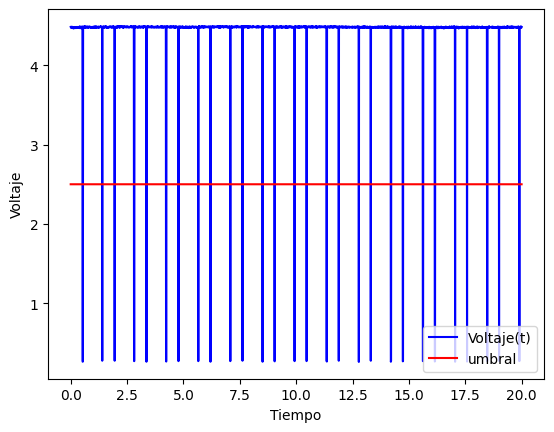


Visualizando los plots, decidimos tomar el umbral debajo de 2.5 en voltaje, ya que serán los datos que realmente nos importan(conocer los picos)



In [ ]:
#Visualizamos y obtenemos los datos de los 10 test cambiando el nombre dentro de la funcion
tiempo = periodos('test1')[0]
voltaje = periodos('test1')[1]
def umbral_plot(x): return 0*x + 2.5

plt.plot(tiempo, voltaje, 'b-', label='Voltaje(t)')
plt.plot(tiempo, umbral_plot(tiempo), 'r-', label='umbral')

plt.ylabel('Voltaje')
plt.xlabel('Tiempo')

plt.legend()
plt.show()

print('\nVisualizando los plots, decidimos tomar el umbral debajo de 2.5 en voltaje, ya que serán los datos que realmente nos importan(conocer los picos)\n')

##Rozamiento

Realizamos un test durante un mayor tiempo, en especifico un minuto para ver cuanto se veian afectados los periodos por culpa del rozamiento con el aire, el mismo fue medido con un angulo aproximadamente igual al resto, con una velocidad inicial que si bien si existe consideramos que despreciable.

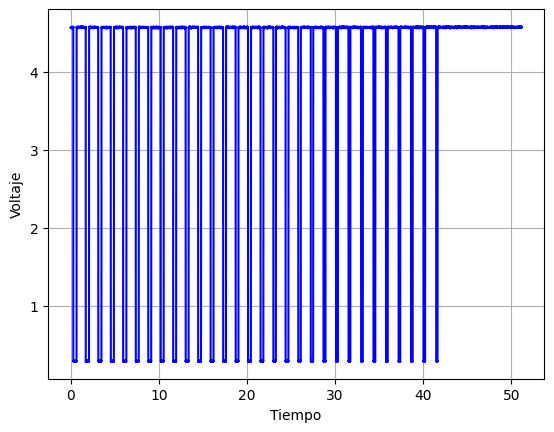

In [ ]:
#Analizamos los datos de rozamiento
tiempo_roz = periodos('Rozamiento')[0]
voltaje_roz = periodos('Rozamiento')[1]

plt.plot(tiempo_roz, voltaje_roz, 'b-')

plt.xlabel("Tiempo")
plt.ylabel('Voltaje')

plt.grid()
plt.show()

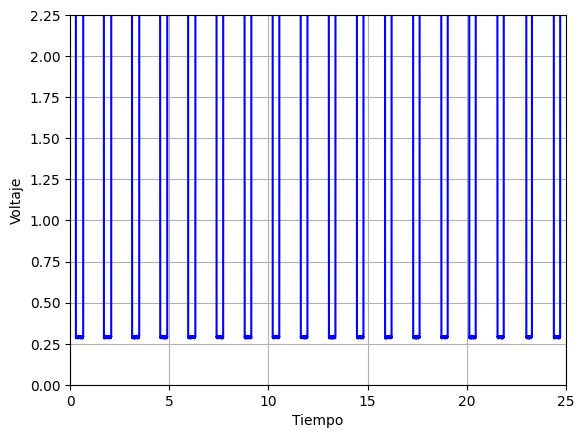

In [ ]:
#vemos en detalle 1ra parte
plt.plot(tiempo_roz, voltaje_roz, 'b-')

plt.ylabel('Voltaje')
plt.xlabel('Tiempo')
plt.ylim(0, 2.25)
plt.xlim(0, 25)

plt.grid()
plt.show()
#se puede ver que en el intervalo de [0;20] segundos los periodos se mantienen simetricos a simple vista

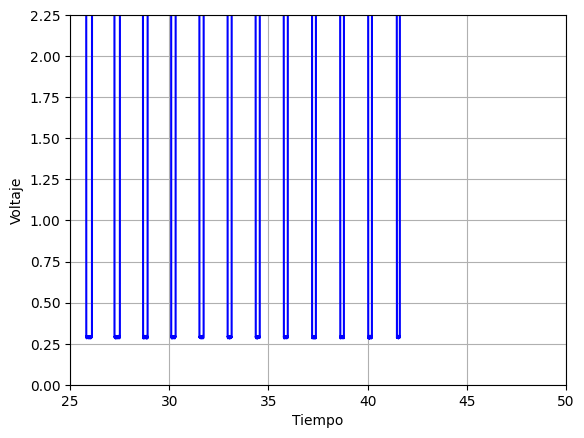

In [ ]:
#vemos en detalle 2da parte
plt.plot(tiempo_roz, voltaje_roz, 'b-')

plt.ylabel('Voltaje')
plt.xlabel('Tiempo')
plt.ylim(0, 2.25)
plt.xlim(25, 50)

plt.grid()
plt.show()
#en cambio, luego de los 20 segundos se comienza a ver una reduccion del tiempo en los periodos mas considerable

Los periodos del péndulo en un tiempo de 1 minuto son: [1.412061 1.41206  1.417085 1.41206  1.417085 1.41206  1.412061 1.417086
 1.432161 1.40201  1.41206  1.417085 1.417085 1.412061 1.412061 1.417085
 1.417085 1.41206  1.417085 1.412061 1.417086 1.417085 1.417085 1.41206
 1.417086 1.417086 1.41206  1.41206  1.417085 1.41206  1.457287 1.422111
 1.386935 1.422111 1.43216  1.40201  1.422111 1.407035 1.437186 1.396985
 1.42211  1.41206  1.422111 1.41206  1.42211  1.412061 1.412061 1.417085
 1.417085 1.41206  1.427136 1.417086 1.417085 1.41206  1.412061 1.41206
 1.442211 1.407036]



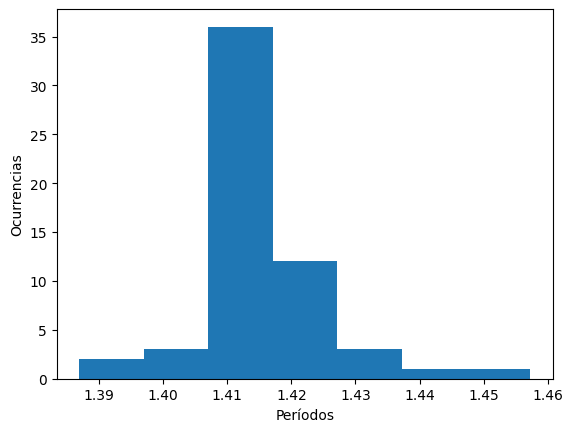

In [ ]:
#Mostramos los periodos tomados en este test que hicimos para ver si el rozamiento era algo despreciable
tau_roz = periodos('Rozamiento')[-2]
print(f'Los periodos del péndulo en un tiempo de 1 minuto son: {tau_roz}\n')

plt.hist(tau_roz, bins=7)

plt.xlabel('Períodos')
plt.ylabel('Ocurrencias')

plt.show()

Con los datos obtenidos pudimos ver que luego de un intervalo de 40 segundos,el doble de tiempo en el cual nosotros realizabamos nuestros test, el rozamiento infiere de manera muy chica o con una presencia baja, por eso decidimos no tener en cuenta el rozamiento, ya que nuestros tests eran medidos en un intervalo de tiempo de 20 segundos y con una velocidad inicial en la que pensamos que es aproximadamente igual que en este test. Si bien sabemos que la fuerza de rozamiento es proporcional a la velocidad, no hubo una gran diferencia entre velocidades para que el rozamiento sea un obstaculo.

##***Cuadrados Mínimos***

In [ ]:
#Calculamos todos los taus y las longitudes:
tau_general = []
longitud_general = []

lista_test = ['test1','test2','test3','test4','test5','test6','test7','test8']

for i in lista_test:
    media_tau = periodos(i)[-1]
    tau_general.append(media_tau)

#Calculamos las longitudes de cada test por separado y los metemos en la lista de "longitud_general"

l1 = calcular_longitudes(32, 50.5)
longitud_general.append(l1)

l2 = calcular_longitudes(34.2, 45.9)
longitud_general.append(l2)

l3 = calcular_longitudes(31.5, 50)
longitud_general.append(l3)

l4 = calcular_longitudes(44.5, 43)
longitud_general.append(l4)

l5 = calcular_longitudes(49.2, 42.3)
longitud_general.append(l5)

l6 = calcular_longitudes(54, 38)
longitud_general.append(l6)

l7 = calcular_longitudes(43.8, 44.5)
longitud_general.append(l7)

l8 = calcular_longitudes(43.3, 45)
longitud_general.append(l8)

tau_general = np.array(tau_general)
longitud_general = np.array(longitud_general)

print(f'Los periodos promedios de cada test (desde el 1 hasta el 8) son: {tau_general}s.\n\nLas longitudes correspondientes a los periodos anteriores son: {longitud_general}cm')

Los periodos promedios de cada test (desde el 1 hasta el 8) son: [1.42115385 1.318916   1.318916   1.26009355 1.20327442 1.06337239
 1.28609717 1.06337239]s.

Las longitudes correspondientes a los periodos anteriores son: [47.89832982 42.59577444 47.45458355 36.79588972 34.41119004 26.73948391
 38.73809495 39.44968314]cm


###**Plots**


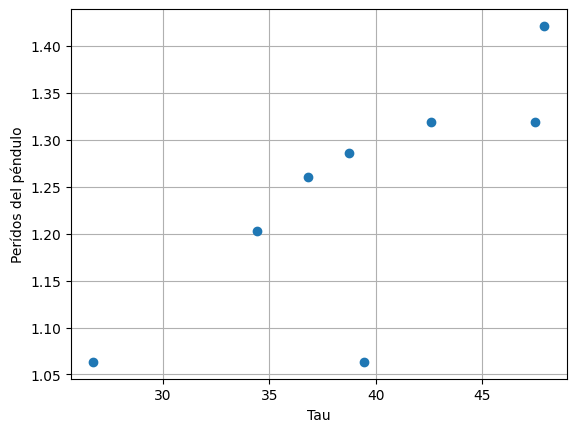

In [ ]:
plt.plot(longitud_general, tau_general, 'o')

plt.xlabel('Tau')
plt.ylabel('Perídos del péndulo')

plt.grid()
plt.show()
#los taus NO estan al cuadrado, hay que linealizarlo

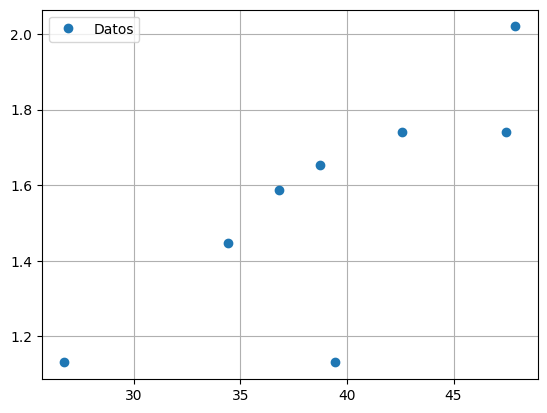

In [ ]:
plt.plot(longitud_general, tau_general**2, 'o', label='Datos')

plt.legend()
plt.grid()
plt.show()
#aca esta linealizado el tau ya que elevamos al cuadrado

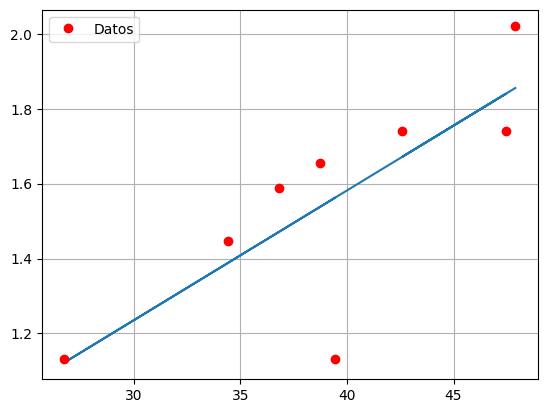

In [ ]:
#Buscamos la pendiente que mejor aproxima a través de polyfit
p = np.polyfit(longitud_general, tau_general**2, 1)

plt.plot(longitud_general, np.polyval(p, longitud_general))
plt.plot(longitud_general, tau_general**2, 'ro', label='Datos')

plt.legend()
plt.grid()
plt.show()


In [ ]:
p2

array([17.64837281, 11.79503283])

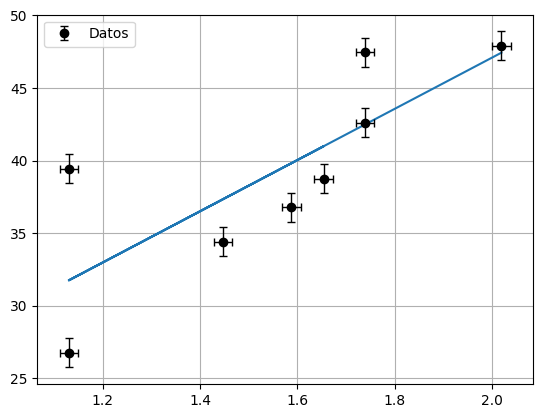

In [ ]:
#Damos vuelta los ejes por la diferencia de error entre cada variable y vemos que el error de los taus es despreciable con el error de las longitudes (el error en el eje x lo calculamos mas abajo).
p2= np.polyfit(tau_general**2,longitud_general, 1)

plt.plot(tau_general**2, np.polyval(p2,tau_general**2 ))
plt.errorbar(tau_general**2, longitud_general, yerr=1, fmt='o', color='black', elinewidth=1, capsize=3, label='Datos')
plt.errorbar(tau_general**2, longitud_general, xerr=0.018925238250260865 , fmt='.', color='black', elinewidth=1, capsize=3)

plt.legend()
plt.grid()
plt.show()

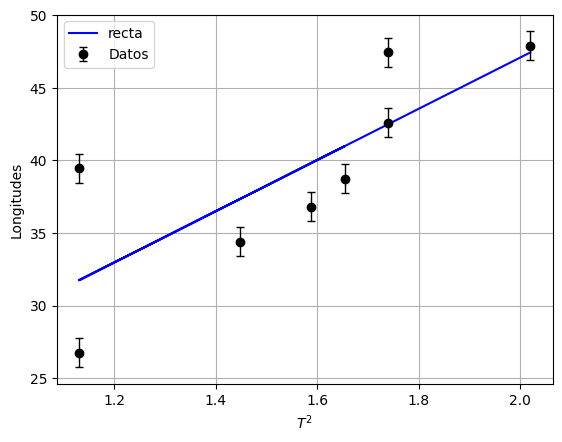

In [ ]:
#Usamos el script que armamos nosotros de la recta de cuadrados minimos
plt.plot(tau_general**2, f(8,tau_general**2, longitud_general), 'b-', label='recta')
plt.errorbar(tau_general**2, longitud_general, yerr=1, fmt='o', color='black', elinewidth=1, capsize=3, label='Datos')

plt.xlabel('$T^2$')
plt.ylabel('Longitudes')

plt.legend()
plt.grid()
plt.show()

In [ ]:
#calculamos g con la pendiente de la recta que aproxima mejor (con polyfit)
g = (4*((np.pi)**2))*p2[0]
print(f'El valor de g a través de polyfit es: {g} cm/s^2')

#calculamos el g pero ahora con el script que hicimos
g= (4*((np.pi)**2))*a(8,tau_general**2,longitud_general)
print(f'El valor de g a través de nuestro script es: {np.round(g, 20)} cm/s^2')

El valor de g a través de polyfit es: 696.7298320025071 cm/s^2
El valor de g a través de nuestro script es: 696.7298320025068 cm/s^2



###**Calculamos los sigmas de tau cuadrado**



In [ ]:
#Guardo en sus respectivas listas los taus de cada test
tau_test1 = np.array(periodos('test1')[-2])
tau_test1 = tau_test1**2

tau_test2 = np.array(periodos('test2')[-2])
tau_test2 = tau_test2**2

tau_test3 = np.array(periodos('test3')[-2])
tau_test3 = tau_test3**2

tau_test4 = np.array(periodos('test4')[-2])
tau_test4 = tau_test4**2

tau_test5 = np.array(periodos('test5')[-2])
tau_test5 = tau_test5**2

tau_test6 = np.array(periodos('test6')[-2])
tau_test6 = tau_test6**2

tau_test7 = np.array(periodos('test7')[-2])
tau_test7 = tau_test7**2

tau_test8 = np.array(periodos('test8')[-2])
tau_test8 = tau_test8**2

#Calculo los promedios de los taus cuadrados de cada test
tau_test_cuadrado_mean_general = []

tau_test1_cuadrado_mean = np.mean(tau_test1)
tau_test_cuadrado_mean_general.append(tau_test1_cuadrado_mean)

tau_test2_cuadrado_mean = np.mean(tau_test2)
tau_test_cuadrado_mean_general.append(tau_test2_cuadrado_mean)

tau_test3_cuadrado_mean = np.mean(tau_test3)
tau_test_cuadrado_mean_general.append(tau_test3_cuadrado_mean)

tau_test4_cuadrado_mean = np.mean(tau_test4)
tau_test_cuadrado_mean_general.append(tau_test4_cuadrado_mean)

tau_test5_cuadrado_mean = np.mean(tau_test5)
tau_test_cuadrado_mean_general.append(tau_test5_cuadrado_mean)

tau_test6_cuadrado_mean = np.mean(tau_test6)
tau_test_cuadrado_mean_general.append(tau_test6_cuadrado_mean)

tau_test7_cuadrado_mean = np.mean(tau_test7)
tau_test_cuadrado_mean_general.append(tau_test7_cuadrado_mean)

tau_test8_cuadrado_mean = np.mean(tau_test8)
tau_test_cuadrado_mean_general.append(tau_test8_cuadrado_mean)

tau_test_cuadrado_mean_general = np.array(tau_test_cuadrado_mean_general)

#Calculo los sigmas de los taus cuadrados de cada test:
sigma_tau_cuadrado_lista = []

sigma_tau_test1_cuadrado = np.std(tau_test1)
sigma_tau_cuadrado_lista.append(sigma_tau_test1_cuadrado)

sigma_tau_test2_cuadrado = np.std(tau_test2)
sigma_tau_cuadrado_lista.append(sigma_tau_test2_cuadrado)

sigma_tau_test3_cuadrado = np.std(tau_test3)
sigma_tau_cuadrado_lista.append(sigma_tau_test3_cuadrado)

sigma_tau_test4_cuadrado = np.std(tau_test4)
sigma_tau_cuadrado_lista.append(sigma_tau_test4_cuadrado)

sigma_tau_test5_cuadrado = np.std(tau_test5)
sigma_tau_cuadrado_lista.append(sigma_tau_test5_cuadrado)

sigma_tau_test6_cuadrado = np.std(tau_test6)
sigma_tau_cuadrado_lista.append(sigma_tau_test6_cuadrado)

sigma_tau_test7_cuadrado = np.std(tau_test7)
sigma_tau_cuadrado_lista.append(sigma_tau_test7_cuadrado)

sigma_tau_test8_cuadrado = np.std(tau_test8)
sigma_tau_cuadrado_lista.append(sigma_tau_test8_cuadrado)

sigma_tau_cuadrado_lista = np.array(sigma_tau_cuadrado_lista)

#Calculo un promedio de los sigmas de los taus cuadrados:
sigmaTcuadrado_promedio = np.mean(sigma_tau_cuadrado_lista)

#la desviacion de todos los L = +-1cm

###Valores de la recta y sus sigmas

In [ ]:
pendiente_a

17.648372814355284

In [ ]:
#Calculamos pendiente de la recta(a), su ordenada al origen(b) y sus respectivos sigmas
pendiente_a = a(8,tau_general**2,longitud_general)
sigma_a = sigma_a(8,tau_general**2,longitud_general)

b = b(8,tau_general**2,longitud_general)
sigma_b = sigma_b(8,tau_general**2,longitud_general)

print(f'La pendiente de la recta es de: {a(8,tau_general**2,longitud_general)}, con un error de: {sigma_a}\n')
print(f'La ordenada al origen de nuestra recta es: {b}, con un error de: {sigma_b}\n')
print(f'El error del eje x(taus) es mucho menor que el error del eje y(longitudes):\n\nEl el promedio de los sigmas de los taus cuadrados es de: {sigmaTcuadrado_promedio}.\n\nEl error de la longitud para todo test es de: 1cm\n')

#Calculamos la propagacion de error de g
dg_da = 4*(np.pi**2) #esta derivada fue calculada a "mano"
sigma_g= np.sqrt((dg_da**2)*(sigma_a**2)) #no tomamos como variable a Pi ya que hoy en dia se conocen los suficientes digitos de este número para despreciar su incerteza
print(f'Nuestro valor de g hallado es = {g}cm/s^2 con un error de {sigma_g}')

La pendiente de la recta es de: 17.648372814355284, con un error de: 1.225039626549243

La ordenada al origen de nuestra recta es: 11.795032832540333, con un error de: 1.9389784183495695

El error del eje x(taus) es mucho menor que el error del eje y(longitudes):

El el promedio de los sigmas de los taus cuadrados es de: 0.018465362248906464.

El error de la longitud para todo test es de: 1cm

Nuestro valor de g hallado es = 696.7298320025068cm/s^2 con un error de 48.36262595879709


##***Promedios de la gravedad***

In [ ]:
#Calculamos la aceleración local de la gravedad de cada test:
g_general = []
sigma_g_general = []

def g_particular(tau_particular_medio, longitud_particular_media): return (4 * (np.pi**2) * longitud_particular_media) / (tau_particular_medio)
def derivada_g_longitud(tau_particular_medio): return ((4) * (np.pi**2)) / (tau_particular_medio)
def derivada_g_tau_cuadrado(tau_particular_medio, longitud_particular_media): return ((-4) * (np.pi**2) * longitud_particular_media) / (tau_particular_medio**2)

for (n, i) in enumerate(zip(tau_test_cuadrado_mean_general, longitud_general)):
    g_general.append(g_particular(i[0], i[1]))
    dg_dl = derivada_g_longitud(i[0])
    dg_dt = derivada_g_tau_cuadrado(i[0], i[1])
    radicando = (dg_dl**2) + ((dg_dt**2) * (sigma_tau_cuadrado_lista[n]**2))
    sigma_g_general.append(np.sqrt(radicando))

g_general = np.array(g_general)
sigma_g_general = np.array(sigma_g_general)


print(f'La aceleracion local de la gravedad es de: {g_general}')
print(f'Los errores de la gravedad para cada test son: {sigma_g_general}')
print(f'\ng medio es: {np.mean(g_general)}, y el error es de: {np.mean(sigma_g_general)}')

La aceleracion local de la gravedad es de: [ 936.19777382  966.67805131 1076.94495423  914.84182062  938.24965098
  933.51168431  924.55882851 1377.2419944 ]
Los errores de la gravedad para cada test son: [25.03074014 24.53464473 24.95815587 25.99015046 28.94697205 37.36666799
 26.35830255 40.06339092]

g medio es: 1008.5280947745082, y el error es de: 29.156128086217777


# Conclusion

Tuvimos inconvenientes con las mediciones que obtuvimos, por mala organización o mala medición per se. Fuimos intercambiando y descartando test para ver que nos de algo cercano a nuestro objetivo. Luego de eso, llegamos a un resultado de g = (9.32 +- 0.50) m/s2 y los valores de la recta nos daban coherente, con un b aproximado a 0. Por accidente presenciamos que al cambiar los valores de la longitud de un test (1) con otro (2) el g ahora era 9.70, mucho más cercano y razonable. El problema comenzó cuando al retomar los valores dichos, el b nos daba 0.08 aprox. con sigma b de +-(0.04) cosa que nos parece extraña considerando que la ley física que queremos testear no cuenta con términos independientes de constantes para que se proyecte una ordenada al origen que no incluye al 0 en la recta de cuadrados mínimos. Luego la propagación de error de g paso a ser +-(0.53). Vimos que el error de los taus cuadrados al haber intercambiado los test seguía manteniéndose muy bajos, por lo que estos no eran realmente el problema. No logramos identificar cuál es el obstáculo, pero dejamos estimado lo siguiente:

* ***Cuadrados Mínimos:***

$g = (932.0 \pm 50.8)\frac{cm}{s^2}$

* ***Promedios***

$g = (934.2 \pm 26.9)\frac{cm}{s^2}$

Hicimos la comparación del g calculado con cuadrados mínimos y el g calculado de la forma tradicional, haciendo el promedio de cada g obtenido en cada medición, con su propagación de error respectivamente.  En el primer caso obtuvimos una propagación de error de 0.50 m/s2 y en el segundo caso, uno de 0.26m/s2. Este último no toma el valor “real” de g.

Lo que buscabamos era probar si la ley fisica que nos dieron cumple realmente con la hipotesis que presenta a traves del metodo de cuadrados minimos. Teniendo en cuenta que tal vez nuestras condiciones ideales y nuestra forma de medicion pudieron tener fallas, creemos que la ley logra se cumple.

Comentario: Las magnitudes expresadas en el texto no son reportes oficiales de nuestras mediciones, se tratan de redondeos para fijar las ideas descriptas. Los resultados finales son los iterados